In [1]:
# Add code view toggle for easier review.
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<i><b>The raw code for this Jupyter notebook is hidden for easier viewing.
To see the raw code and turn on/off, click <a href="javascript:code_toggle()">here<a><b><i>.''')

**Dataset(s) used for Thinkful's Data Science Prep and Bootcamp Capstone**

Progressing through data cleaning and validation brought to light inconsistencies in the initial dataset. A hankering to find more accurate data drove me to read the actual _World Happiness Reports(WHR) for 2015-2017._ The 2018 report took a strong data science approach in analyzing the data, and revised portions of 2016 results. The 2018 report aggregated data from 2006 to 2017 WHR reports, thereby invalidating my original dataset, i.e. the 2017 data already included 2015 and 2016 and comparing the datasets I initially chose would result in innacurate reporting.

The inital dataset used for this report combined 2015, 2016 and 2017 data from the _[Kaggle “World Happiness Report"](https: // www.kaggle.com/unsdsn/world-happiness)_ competition. While sufficient for the purpose of teaching beginning data science principles, there are inconsistencies in the structure of this particular dataset including column structure, missing countries, statistical calculations and methods and criteria used in producing the original data that deserve a deeper look for further, more in-depth research.

After the discovery of additional data, I revised my calculations and visualizations to reflect the data from the _[2018 World Happiness Report](http: // worldhappiness.report/ed/2018/)._

**Origination and Description of Data**

_The World Happiness Reports(WHR)_ are derived from the annual _Gallup World Poll_ data. The dataset is comprised of approximately 160 countries globally. Country data is collected from 1000 people on a probability basis with national representation of each countries' non-institutionalized population aged 15 and older. Surveys are conducted by telephone survey in countries where 80 % of the country has landlines or cell phones or in person if phone access is limited. Some countries are oversampled or undersampled due to safety and geographic conditions that make it impossible to reach certain areas.

**Description of Dataset**

The “World Happiness Score" is calculated from six lifestyle indicators: levels of GDP, life expectancy, generosity, social support, freedom, and corruption and compared to an imaginary country 'Dystopia', in which each lifestyle indicator is the lowest of the world averages. Lifestyle indicators are derived from detailed questions contained in over thirteen metrics from the[Gallup World Poll](https: // www.gallup.com/analytics/232838/world-poll.aspx).

Each participant in the survey answers the questions using the[Cantril Ladder](https: // news.gallup.com/poll/122453/understanding-gallup-uses-cantril-scale.aspx) method as adopted by Gallup, for purposes of of rating their answer on a 1-10 score. In some cases, WHR questions are modified to reflect the culture and current events of each country. If data is incomplete for a year, various statistical methods including interpolation are used to calculate data based on prior year(s) data. The Cantril method is one of the[OECD Guidelines on Measuring Subjective Well-being](http: // www.oecd.org/statistics/oecd-guidelines-on-measuring-subjective-well-being-9789264191655-en.htm) developed as recommendations for gathering subjective well-being data as part of an international initiative to improve monitoring and policy making.

**An interesting outcome of the World Happiness Report** is the adoption by organizations such as _[OCED] (http: // www.oecd.org/statistics/oecd-guidelines-on-measuring-subjective-well-being-9789264191655-en.htm)_ and the_[Global Happiness Council] (http: // www.happinesscouncil.org/)_. Since 2015 the annual report has been shared on_[World Happiness Day - March 20] (http: // www.un.org/en/events/happinessday/)_. These organizations and others integrate results of the report in efforts to drive the adoption of social factors determining happiness in global public policy standards.

**How has World Happiness changed from 2015-2017?**

Although the survey changes year to year in terms of analysis and interpretation, the main tenet throughout the annual surveys are the fluid learning points on how people measure happiness. The difference in survey mechanisms don't invalidate the analysis, rather they lend a unique perspective to each year, while data remains intact and available for use in future years. Recent years reflect an evolution of a yearly theme: [2015]() explored deeper analysis in several areas, [2016]()(http: // worldhappiness.report/ed/2016/) extended the analysis to explore inequities in an individuals happiness across countries and [2017]()(https: // s3.amazonaws.com/happiness-report/2017/HR17-Ch1.pdf) gave special attention to the social foundations of happiness for individuals and nations.

In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
# Import Matplotlib and Seaborn for visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Import Python Modules for calculation
import pandas as pd
import numpy as np
import scipy.stats as stats
import math

In [4]:
# Set background & color
sns.set(style="white")
sns.setcolorpalette = ('viridis')

# Set context to `"notebook"`
sns.set_context("notebook")

In [5]:
# Import World Happiness 2015 - 2017 data as DataFrame
df = pd.read_csv('WHR2018.csv')

In [6]:
# @hidden_cell
# Rename columns for clarity and brevity

df.rename(columns={'Region indicator': 'Region',
                   'Life ladder, 2015-2017': 'Life Ladder',
                   'GDP per person, 2015-2017': 'Economy',
                   'Healthy life expectancy, 2015-2017': 'Life Expectancy',
                   'Social support, 2015-2017': 'Social Support',
                   'Freedom to make life choices, 2015-2017': 'Freedom',
                   'Generosity, 2015-2017, without adjustment for GDP per person': 'Generosity',
                   'Perceptions of corruption, 2015-2017': 'Trust',
                   }, inplace=True)

## What do the summary statistics show when grouped by Region?

There is an interesting difference between economic prosperity between regions. Further research might include causal factors and potential opportunities.

In [7]:
df.groupby(df['Region']).describe()

Life Ladder                                \
                                         count      mean       std       min   
Region                                                                         
Central and Eastern Europe                17.0  5.629809  0.522536  4.586040   
Commonwealth of Independent States        12.0  5.241908  0.654321  4.102899   
East Asia                                  6.0  5.671889  0.496095  5.124616   
Latin America and Caribbean               22.0  5.950038  0.717470  3.581960   
Middle East and North Africa              19.0  5.294109  1.034323  3.354938   
North America and ANZ                      4.0  7.202595  0.212581  6.886040   
South Asia                                 7.0  4.603908  0.606227  3.631519   
Southeast Asia                             9.0  5.313452  0.794884  4.307814   
Sub-Saharan Africa                        39.0  4.195002  0.610522  2.904535   
Western Europe                            21.0  6.763981  0.732270  5.357861   

                                                                            \
                                         25%       50%       75%       max   
Region                                                                       
Central and Eastern Europe          5.321210  5.662149  5.947598  6.710905   
Commonwealth of Independent States  4.933189  5.417928  5.677307  6.096068   
East Asia                           5.291956  5.652662  5.905000  6.440560   
Latin America and Caribbean         5.698393  6.153874  6.386431  7.071654   
Middle East and North Africa        4.649464  5.253713  6.094228  7.189999   
North America and ANZ               7.175549  7.297907  7.324954  7.328528   
South Asia                          4.330204  4.500391  4.981288  5.472466   
Southeast Asia                      4.623141  5.103246  6.072288  6.343201   
Sub-Saharan Africa                  3.784234  4.300587  4.564629  5.891469   
Western Europe                      6.309878  6.926886  7.441339  7.632102   

                                   Standard error, life ladder, 2015-2017  \
                                                                    count   
Region                                                                      
Central and Eastern Europe                                           17.0   
Commonwealth of Independent States                                   12.0   
East Asia                                                             6.0   
Latin America and Caribbean                                          22.0   
Middle East and North Africa                                         19.0   
North America and ANZ                                                 4.0   
South Asia                                                            7.0   
Southeast Asia                                                        9.0   
Sub-Saharan Africa                                                   39.0   
Western Europe                                                       21.0   

                                              ...     Trust            \
                                        mean  ...       75%       max   
Region                                        ...                       
Central and Eastern Europe          0.044658  ...  0.921141  0.946653   
Commonwealth of Independent States  0.040608  ...  0.897721  0.946052   
East Asia                           0.040340  ...  0.851700  0.888112   
Latin America and Caribbean         0.063470  ...  0.847736  0.912231   
Middle East and North Africa        0.055299  ...  0.809573  0.884624   
North America and ANZ               0.043870  ...  0.482327  0.700341   
South Asia                          0.046270  ...  0.828450  0.879705   
Southeast Asia                      0.052302  ...  0.837455  0.914106   
Sub-Saharan Africa                  0.062131  ...  0.846825  0.893569   
Western Europe                      0.040461  ...  0.691878  0.915970   

                           

## What does the data show us when grouped by Region?

North America, Australia and New Zealand, and some portions of Western Europe are the happiest regions, and among the countries with the largest economies, life expectancy and social support. Further research and comparison of to see how different factors affect happiness within the regions is warranted.

In [8]:
df.drop(columns=['country', 'Standard error, life ladder, 2015-2017',
                 'Log of GDP per person, 2015-2017', 'Standard error, social support, 2015-2017',
                 'Standard error, freedom to make life choices, 2015-2017',
                 'Standard error, generosity, 2015-2017',
                 'Standard error, perceptions of corruption, 2015-2017'], inplace=True)
df.head(15)

,Region,Life Ladder,Economy,Life Expectancy,Social Support,Freedom,Generosity,Trust
0,South Asia,3.631519,1741.687500,52.013329,0.525075,0.445294,0.179054,0.879705
1,Central and Eastern Europe,4.586040,11363.095700,68.871552,0.639576,0.726340,0.259975,0.886778
2,Middle East and North Africa,5.294638,13914.723630,65.604858,0.776977,0.439177,0.128988,0.698343
3,Sub-Saharan Africa,3.794838,6260.132813,52.460709,0.765275,0.374173,0.106829,0.833540
4,Latin America and Caribbean,6.387958,18807.310550,67.398483,0.905565,0.853390,0.163174,0.847882
5,Commonwealth of Independent States,4.320565,8257.704102,64.962479,0.710185,0.592958,0.122584,0.895625
6,North America and ANZ,7.272051,44374.464840,72.650299,0.948141,0.918004,0.694879,0.388529
7,Western Europe,7.139362,44574.488280,72.049568,0.920177,0.893372,0.509860,0.533494
8,Commonwealth of Independent States,5.200595,16086.653320,62.969749,0.779933,0.735739,0.104109,0.620859
9,Middle East and North Africa,6.105069,44064.632810,65.976791,0.863598,0.874141,0.510673,NaN


## What does the Life Ladder Score show us in a distribution plot? 

Normalized distribution for all regions between 2015-2017 indicates most of global happiness falls between 4 and 6.5. Further research on individual factors may highlight areas to improve within each region.

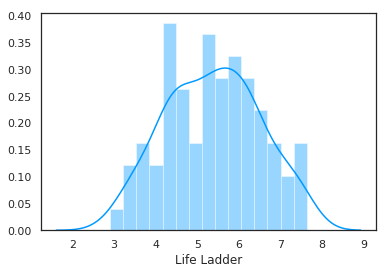

In [9]:
# KDE Plot
sns.distplot(df['Life Ladder'], color='#0099FF', bins=15)

## Taking a look at a boxplot of _Life Ladder Ratings_ by each region we see...
Western Europe and North America & ANZ are the happiest regions. There are outliers in Sub-Saharan Africa, Latin America and Caribbean, and North America and ANZ. It's possible socio-economic factors and political climate come into play in these regions and warrant further research.

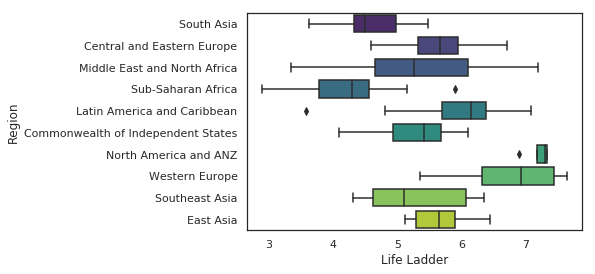

In [10]:
sns.boxplot(x="Life Ladder", y="Region", palette='viridis', data=df)

## A Barplot confirms North America and Australia/New Zealand are the happiest regions.

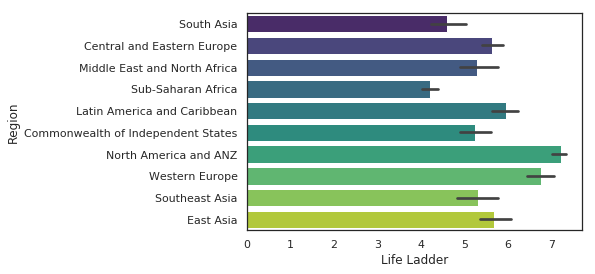

In [11]:
# Barplot
sns.barplot(x="Life Ladder", y="Region", palette='viridis', data=df)

## We see the same results in a Strip Plot as we saw in the Barplot.
Overall, the happiest regions are North America, Australia & New Zealand as well as a good part of Western Europe. There are outliers in Latin America, Middle East and North Africa indicating a small part of the population in those regions are happier than most. 

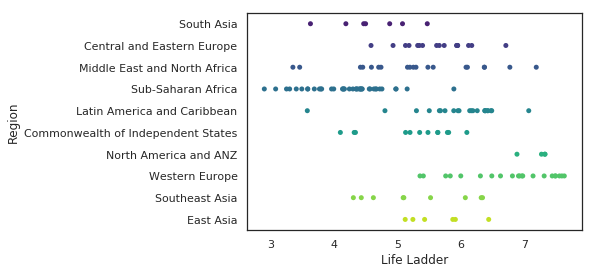

In [12]:
# Create Stripplot
sns.stripplot(x="Life Ladder", y="Region",
              palette='viridis', jitter=False, data=df)

## Linear Regression shows the confidence interval of _Economy_ and _Life Ladder_ 
with the log of GDP per country appearing to increase to around $40,000 at the highest happiness level. This could be interesting to look at improving the global living minimum wage.

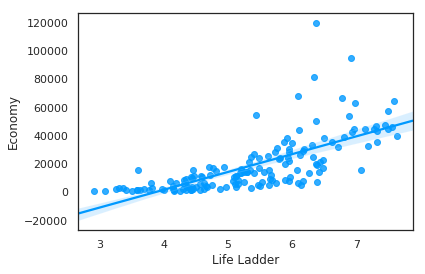

In [13]:
# Linear Regression
sns.regplot(x='Life Ladder', y='Economy', color='#0099FF', data=df)

##  PairGrid highlights each Life Ladder variable by region. 
Economy seems to top out at a certain level indicating it's not the only factor in happiness. Social Support appears to be an important factor as well. Having this many variables makes it difficult to see detail, future research would benefit from analyzing each by factor and comparing regions.

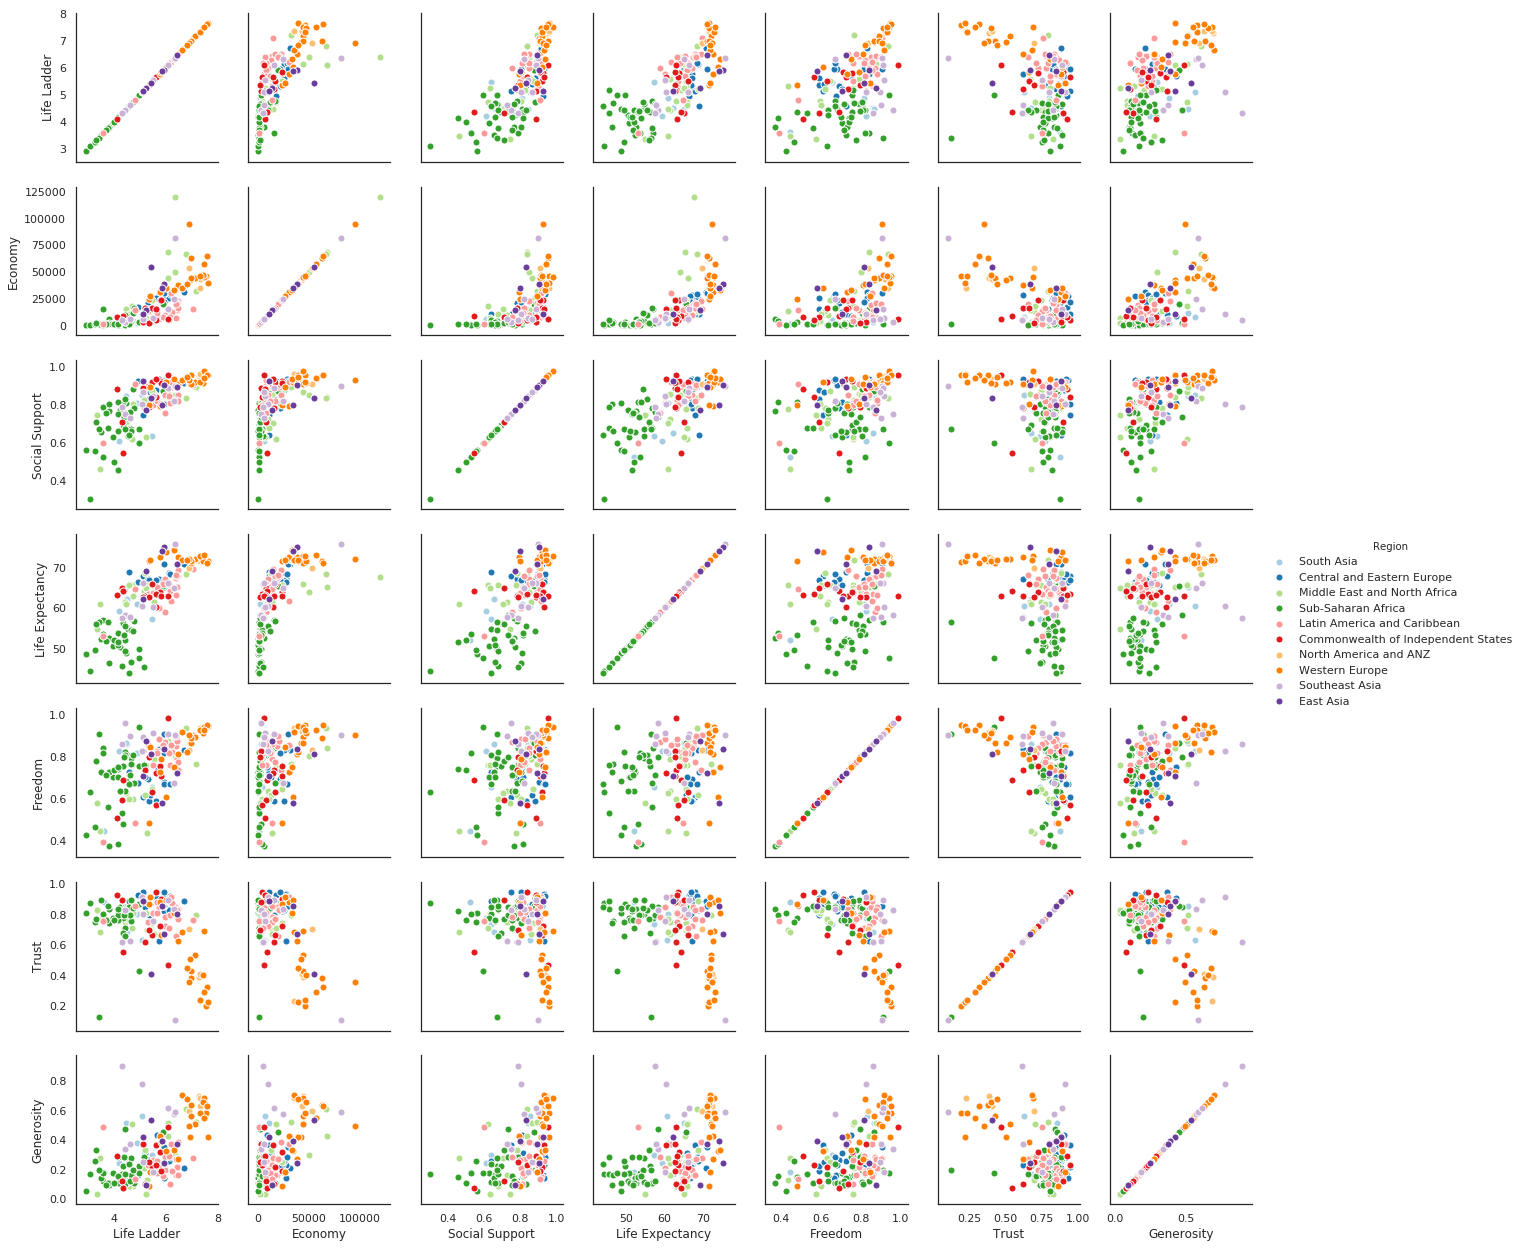

In [14]:
g = sns.PairGrid(data=df,
                 vars=['Life Ladder', 'Economy', 'Social Support', 'Life Expectancy',
                       'Freedom', 'Trust', 'Generosity'], hue='Region', palette='Paired')
g.map(plt.scatter, edgecolor='white', s=50)
g.add_legend()

##  The Pair Grid may support the theory that those countries with a happiness score over 7 are outliers worldwide. 
Note that only the top three Life Ladder indicators are included in this observation. Additional research is warranted.

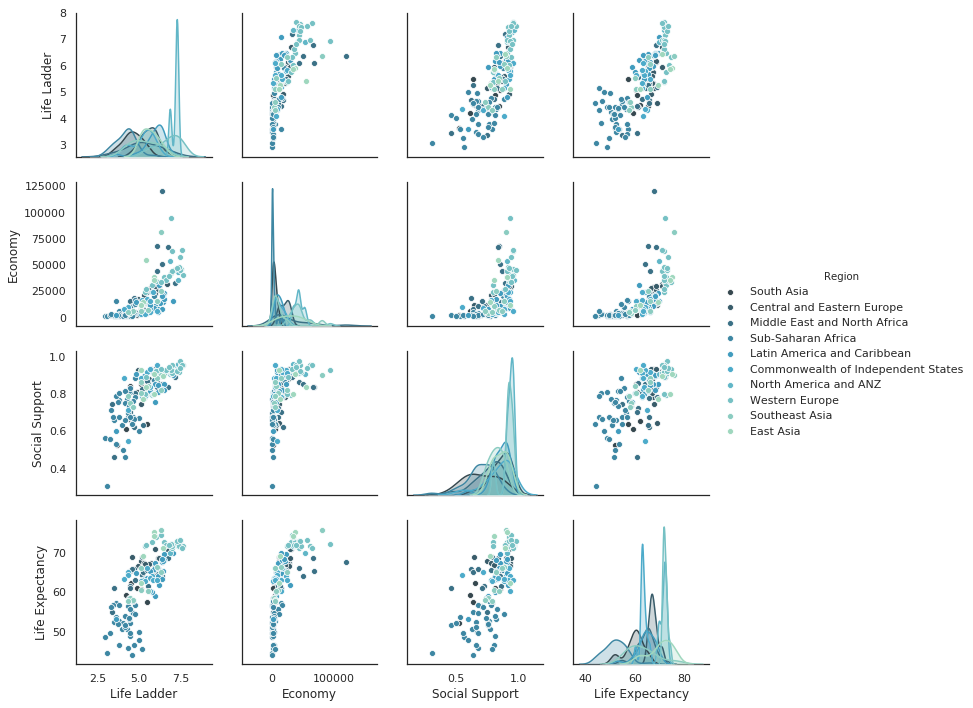

In [15]:
g = sns.pairplot(data=df,
                 vars=['Life Ladder', 'Economy', 'Social Support', 'Life Expectancy',
                       ], hue='Region', palette='GnBu_d', diag_kind="kde")

##  What _Life Ladder_ factors show the strongest correlation to World Happiness?

The ***Correlation Heatmap*** shows the strongest correlations based on the _Life Ladder_ are Life Expectancy, Social Support and Economy. 
Further research into how these correlations shift via region and country in 2018 & 2019 would be interesting.

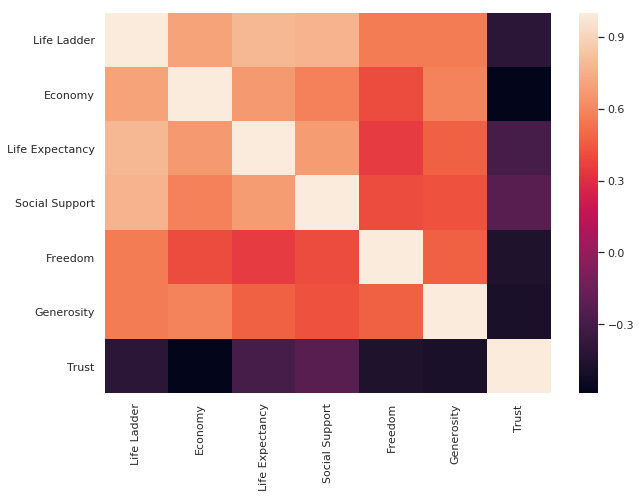

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr())

## Further Research on World Happiness 2015-2017 Results

1. Tie historical facts and observations 2015-2017 world events to each year.
a. What was the effect of Arab Spring on World Happiness 2015-2017?
b. How does migration affect happiness?

2. Reassess 2015-2017 individual data using a subset of the top five and bottom five countries in the European Commission to determine if there are differences in statistical outcomes.

3. What are the probabilities of happiness in future years based on historical events in the subsets in 2015-2017?

4. Have the European Commission[2015-2019 priorities](https: // ec.europa.eu/commission/priorities_en) results changed in relation to 2015-2017 World Happiness results?
a. Are they projected to change for 2018 and 2019 based on the 2015-2017 data?